<div class="alert alert-block alert-success">
<h1>SNOWPACK Model</h1></div>

**Student:** Kirsten Schulze <br>
**Email:** <kirsten.schulze@studium.uni-hamburg.de> <br>

**MSc Thesis in Ocean and Climate Physics** <br>
**Title:** Evaluation of Snow Depth Retrievals from Differences in ICESat-2 and CryoSat-2 Freeboards Using In-Situ Measurements in the Weddell Sea  <br>
**Supervisors:** Prof. Dr. Stefanie Arndt and Dr. Stefan Kern <br>
**Hamburg University** <br>


<div class="alert alert-info" role="alert">

## <a id="TOC_TOP"></a>Contents

</div>

1. [Snow Buoys and Satellite Product (Matches for 2019, 2021, 2022)](#section1)
1. [Snow Depth from SNOWPACK Model with OHF3](#section2)
	1. [Load Hourly Snow Depth](#section2.1)
	1. [Filtering Snowpack Data by Date and Sensor for 29 Matches](#section2.2)
	1. [Calculating Mean and Standard Deviation](#section2.3)
1. [Snow Depth from SNOWPACK Model with OHF5](#section3)
	1. [Load Hourly Snow Depth](#section3.1)
	1. [Filtering Snowpack Data by Date and Sensor for 29 Matches](#section3.2)
	1. [Calculating Mean and Standard Deviation](#section3.3)
1. [Snow Depth Analysis Using SNOWPACK Model](#section4)

<hr>

In [1]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
plt.style.use("ggplot")

<div class="alert alert-info" role="alert">

## <a id="section1"></a>Snow Buoys and Satellite Product (Matches for 2019, 2021, 2022)
[Back to top](#TOC_TOP)

</div>

In [3]:
file = "matches_2019.txt"
ds = pd.read_csv(file, sep=None, engine="python") 
matches_2019 = ds

In [4]:
file = "matches_2021.txt"
ds = pd.read_csv(file, sep=None, engine="python") 
matches_2021 = ds

In [5]:
file = "matches_2022.txt"
ds = pd.read_csv(file, sep=None, engine="python") 
matches_2022 = ds

In [6]:
ds_matches_all = pd.concat([matches_2019, matches_2021, matches_2022])
ds_matches_all = ds_matches_all.reset_index(drop=True)
ds_matches_all["Timestamp"] = pd.to_datetime(ds_matches_all["Timestamp"])
ds_matches_all

,Year,Month,Day,X,Y,Snow_depth_satellite,Snow_depth_buoy,Mean_snow_accu,X_buoy,Y_buoy,Sensor_Number,lat_buoy,lon_buoy,lat_Kako20,lon_Kako20,Timestamp
0,2019,5,6,-850.0,1550.0,11.35041,69.652,106.428,-852.700889,1548.047796,S56,-73.7900,-28.8470,-73.78629,-28.73980,2019-05-06
1,2019,5,22,-900.0,1425.0,23.25146,69.014,105.882,-911.347875,1433.840884,S56,-74.4098,-32.4400,-74.53261,-32.27565,2019-05-22
2,2019,6,23,-1100.0,1425.0,29.40812,68.443,105.311,-1101.271050,1432.386386,S56,-73.4330,-37.5544,-73.49296,-37.66562,2019-06-23
3,2019,9,9,-1400.0,1650.0,24.64406,69.910,107.286,-1395.346692,1660.871508,S56,-70.1682,-40.0346,-70.21578,-40.31410,2019-09-09
4,2019,10,5,-1450.0,1775.0,29.25603,72.372,109.749,-1450.425563,1771.493331,S56,-69.0910,-39.3092,-69.06914,-39.24543,2019-10-05
5,2021,4,1,-950.0,1250.0,4.23426,56.272,56.272,-947.114309,1257.867750,S114,-75.5392,-36.9780,-75.58042,-37.23483,2021-04-01
6,2021,4,2,-875.0,1450.0,2.67530,27.575,27.575,-875.433826,1450.742312,S112,-74.4510,-31.1084,-74.45880,-31.10881,2021-04-02
7,2021,4,6,-950.0,1300.0,5.77390,56.108,56.108,-951.990407,1303.353240,S114,-75.1808,-36.1450,-75.21606,-36.15818,2021-04-06
8,2021,4,7,-800.0,1550.0,19.25122,71.266,110.243,-802.774653,1560.944791,S55,-73.8994,-27.2162,-73.99904,-27.29957,2021-04-07
9,2021,4,15,-875.0,1450.0,4.44346,23.484,27.45,-879.643312,1441.222830,S112,-74.5050,-31.3976,-74.45880,-31.10881,2021-04-15


<div class="alert alert-info" role="alert">

## <a id="section2"></a>Snow Depth from SNOWPACK Model with OHF3
[Back to top](#TOC_TOP)

</div>

<div class="alert alert-danger" role="alert">

### <a id="section2.1"></a> Load Hourly Snow Depth
[Back to top](#TOC_TOP)

</div>

Files for the oceanic heat flux of 3W/m2. Note: S9, S37, S49 and S88 are calculated with the ‘BUCKET’ scheme, all others with the Richards Equation. However, only Snow Buoys with the Richards equation are used for this analysis: S56, S55, S112, S114

In [7]:
path = "ice_and_snowthicknesses_ANT_OHF3_26July24/"
file = path+"S56_ice_snow_thick_buoyforced_OHF3_atmHOLTSLAG_keepsnowice.csv"
ds_S56 = pd.read_csv(file, sep=None, engine="python") 
ds_S56["date"] = pd.to_datetime(ds_S56["date"])
ds_S56["Sensor_Number"] = "S56" 
ds_S56

,date,snow_cm,snowice_cm,superimposed_ice_cm,slush_cm,ice_cm,Sensor_Number
0,2018-06-15 01:00:00,24.70,0.0,0.00,0.00,105.00,S56
1,2018-06-15 02:00:00,24.70,0.0,0.00,0.00,105.01,S56
2,2018-06-15 03:00:00,24.70,0.0,0.00,0.00,105.02,S56
3,2018-06-15 04:00:00,24.70,0.0,0.00,0.00,105.02,S56
4,2018-06-15 05:00:00,24.70,0.0,0.00,0.00,105.04,S56
...,...,...,...,...,...,...,...
14112,2020-01-24 01:00:00,45.05,0.0,6.40,72.06,101.47,S56
14113,2020-01-24 02:00:00,45.04,0.0,6.39,72.06,101.47,S56
14114,2020-01-24 03:00:00,45.05,0.0,6.37,72.06,101.47,S56
14115,2020-01-24 04:00:00,45.04,0.0,6.38,72.05,101.47,S56


In [8]:
path = "ice_and_snowthicknesses_ANT_OHF3_26July24/"
file = path+"S114_ice_snow_thick_buoyforced_OHF3_atmHOLTSLAG_keepsnowice.csv"
ds_S114 = pd.read_csv(file, sep=None, engine="python") 
ds_S114["date"] = pd.to_datetime(ds_S114["date"])
ds_S114["Sensor_Number"] = "S114" 
ds_S114

,date,snow_cm,snowice_cm,superimposed_ice_cm,slush_cm,ice_cm,Sensor_Number
0,2021-02-19 19:00:00,47.50,0.00,0.00,0.00,140.00,S114
1,2021-02-19 20:00:00,47.49,0.00,0.00,0.00,140.00,S114
2,2021-02-19 21:00:00,47.48,0.00,0.00,0.00,140.00,S114
3,2021-02-19 22:00:00,47.46,0.00,0.00,0.00,140.00,S114
4,2021-02-19 23:00:00,47.44,0.00,0.00,0.00,140.00,S114
...,...,...,...,...,...,...,...
14404,2022-10-12 23:00:00,84.97,23.42,10.09,25.15,128.82,S114
14405,2022-10-13 00:00:00,84.94,23.42,10.08,25.16,128.82,S114
14406,2022-10-13 01:00:00,84.91,23.42,10.08,25.16,128.82,S114
14407,2022-10-13 02:00:00,84.89,23.43,10.08,25.14,128.82,S114


In [9]:
path = "ice_and_snowthicknesses_ANT_OHF3_26July24/"
file = path+"S112_ice_snow_thick_buoyforced_OHF3_atmHOLTSLAG_keepsnowice.csv"
ds_S112 = pd.read_csv(file, sep=None, engine="python") 
ds_S112["date"] = pd.to_datetime(ds_S112["date"])
ds_S112["Sensor_Number"] = "S112" 
ds_S112

,date,snow_cm,snowice_cm,superimposed_ice_cm,slush_cm,ice_cm,Sensor_Number
0,2021-03-11 19:00:00,29.0,0.00,0.00,0.0,125.00,S112
1,2021-03-11 20:00:00,29.0,0.00,0.00,0.0,125.00,S112
2,2021-03-11 21:00:00,29.0,0.00,0.00,0.0,125.00,S112
3,2021-03-11 22:00:00,29.0,0.00,0.00,0.0,125.00,S112
4,2021-03-11 23:00:00,29.0,0.00,0.00,0.0,125.00,S112
...,...,...,...,...,...,...,...
1309,2021-05-05 08:00:00,11.3,5.71,11.88,0.0,130.72,S112
1310,2021-05-05 09:00:00,11.3,5.72,11.87,0.0,130.73,S112
1311,2021-05-05 10:00:00,11.3,5.72,11.87,0.0,130.74,S112
1312,2021-05-05 11:00:00,11.3,5.72,11.88,0.0,130.75,S112


In [10]:
path = "ice_and_snowthicknesses_ANT_OHF3_26July24/"
file = path+"S55_ice_snow_thick_buoyforced_OHF3_atmHOLTSLAG_keepsnowice.csv"
ds_S55 = pd.read_csv(file, sep=None, engine="python") 
ds_S55["date"] = pd.to_datetime(ds_S55["date"])
ds_S55["Sensor_Number"] = "S55"  
ds_S55

,date,snow_cm,snowice_cm,superimposed_ice_cm,slush_cm,ice_cm,Sensor_Number
0,2020-07-30 19:00:00,39.09,0.00,2.00,0.00,123.00,S55
1,2020-07-30 20:00:00,39.10,0.00,2.00,0.00,123.01,S55
2,2020-07-30 21:00:00,39.10,0.00,2.00,0.00,123.03,S55
3,2020-07-30 22:00:00,39.09,0.00,2.00,0.00,123.05,S55
4,2020-07-30 23:00:00,39.09,0.00,2.00,0.00,123.06,S55
...,...,...,...,...,...,...,...
8343,2021-07-13 10:00:00,51.20,31.58,8.93,22.71,110.47,S55
8344,2021-07-13 11:00:00,51.20,31.58,8.93,22.71,110.47,S55
8345,2021-07-13 12:00:00,51.20,31.58,8.93,22.71,110.47,S55
8346,2021-07-13 13:00:00,51.20,31.58,8.93,22.71,110.47,S55


In [11]:
ds_snowpack_OHF3 = pd.concat([ds_S56, ds_S55, ds_S112, ds_S114])
ds_snowpack_OHF3 = ds_snowpack_OHF3.reset_index(drop=True)
ds_snowpack_OHF3["date"] = pd.to_datetime(ds_snowpack_OHF3["date"])
ds_snowpack_OHF3

,date,snow_cm,snowice_cm,superimposed_ice_cm,slush_cm,ice_cm,Sensor_Number
0,2018-06-15 01:00:00,24.70,0.00,0.00,0.00,105.00,S56
1,2018-06-15 02:00:00,24.70,0.00,0.00,0.00,105.01,S56
2,2018-06-15 03:00:00,24.70,0.00,0.00,0.00,105.02,S56
3,2018-06-15 04:00:00,24.70,0.00,0.00,0.00,105.02,S56
4,2018-06-15 05:00:00,24.70,0.00,0.00,0.00,105.04,S56
...,...,...,...,...,...,...,...
38183,2022-10-12 23:00:00,84.97,23.42,10.09,25.15,128.82,S114
38184,2022-10-13 00:00:00,84.94,23.42,10.08,25.16,128.82,S114
38185,2022-10-13 01:00:00,84.91,23.42,10.08,25.16,128.82,S114
38186,2022-10-13 02:00:00,84.89,23.43,10.08,25.14,128.82,S114


<div class="alert alert-danger" role="alert">

### <a id="section2.2"></a> Filtering Snowpack Data by Date and Sensor for 29 Matches
[Back to top](#TOC_TOP)

</div>

In [12]:
# Create an empty DataFrame to store the filtered rows
filtered_df = pd.DataFrame(columns=ds_snowpack_OHF3.columns)

# Iterate through each row in ds_matches_all and filter ds_snowpack accordingly
for index, row in ds_matches_all.iterrows():
    year = row["Year"]
    month = row["Month"]
    day = row["Day"]
    sensor = row["Sensor_Number"]
    
    
    # Filter the ds_snowpack
    temp_df = ds_snowpack_OHF3[(ds_snowpack_OHF3["date"].dt.year == year) & 
                          (ds_snowpack_OHF3["date"].dt.month == month) & 
                          (ds_snowpack_OHF3["date"].dt.day == day) & 
                          (ds_snowpack_OHF3["Sensor_Number"] == sensor)]
    
    
    # Append the filtered rows to filtered_df
    filtered_df = pd.concat([filtered_df, temp_df], ignore_index=True)
    
ds_snowpack_OHF3_matches = filtered_df
ds_snowpack_OHF3_matches

,date,snow_cm,snowice_cm,superimposed_ice_cm,slush_cm,ice_cm,Sensor_Number
0,2019-05-06 00:00:00,47.14,2.78,8.81,46.40,104.27,S56
1,2019-05-06 01:00:00,47.11,2.78,8.81,46.41,104.26,S56
2,2019-05-06 02:00:00,47.10,2.78,8.80,46.40,104.26,S56
3,2019-05-06 03:00:00,47.07,2.78,8.81,46.41,104.25,S56
4,2019-05-06 04:00:00,47.06,2.78,8.80,46.40,104.25,S56
...,...,...,...,...,...,...,...
691,2022-08-17 19:00:00,72.01,31.86,14.07,8.47,132.38,S114
692,2022-08-17 20:00:00,72.01,31.86,14.06,8.48,132.37,S114
693,2022-08-17 21:00:00,72.01,31.86,14.06,8.48,132.37,S114
694,2022-08-17 22:00:00,72.01,31.86,14.06,8.48,132.36,S114


<div class="alert alert-danger" role="alert">

### <a id="section2.3"></a> Calculating Mean and Standard Deviation 
[Back to top](#TOC_TOP)

</div>

In [13]:
df = ds_snowpack_OHF3_matches

# Convert the "date" column to datetime format
df["date"] = pd.to_datetime(df["date"])

# Extract the date part only for grouping
df["date_only"] = df["date"].dt.date


# Group by "date_only" and calculate the mean and standard deviation of "snow_cm"
SNOWPACK_3_OHF = df.groupby(["date_only", "Sensor_Number"])["snow_cm"].agg(
    mean_snow_cm_OHF3="mean",
    std_snow_cm_OHF3="std"
).reset_index()

In [14]:
ds_matches_all["mean_snow_cm_OHF3"] = SNOWPACK_3_OHF["mean_snow_cm_OHF3"]
ds_matches_all["std_snow_cm_OHF3"] = SNOWPACK_3_OHF["std_snow_cm_OHF3"]
matches_all= ds_matches_all
matches_all

,Year,Month,Day,X,Y,Snow_depth_satellite,Snow_depth_buoy,Mean_snow_accu,X_buoy,Y_buoy,Sensor_Number,lat_buoy,lon_buoy,lat_Kako20,lon_Kako20,Timestamp,mean_snow_cm_OHF3,std_snow_cm_OHF3
0,2019,5,6,-850.0,1550.0,11.35041,69.652,106.428,-852.700889,1548.047796,S56,-73.7900,-28.8470,-73.78629,-28.73980,2019-05-06,46.650000,0.322423
1,2019,5,22,-900.0,1425.0,23.25146,69.014,105.882,-911.347875,1433.840884,S56,-74.4098,-32.4400,-74.53261,-32.27565,2019-05-22,49.038333,0.010072
2,2019,6,23,-1100.0,1425.0,29.40812,68.443,105.311,-1101.271050,1432.386386,S56,-73.4330,-37.5544,-73.49296,-37.66562,2019-06-23,46.260000,0.005898
3,2019,9,9,-1400.0,1650.0,24.64406,69.910,107.286,-1395.346692,1660.871508,S56,-70.1682,-40.0346,-70.21578,-40.31410,2019-09-09,48.035000,0.154947
4,2019,10,5,-1450.0,1775.0,29.25603,72.372,109.749,-1450.425563,1771.493331,S56,-69.0910,-39.3092,-69.06914,-39.24543,2019-10-05,50.217500,0.740283
5,2021,4,1,-950.0,1250.0,4.23426,56.272,56.272,-947.114309,1257.867750,S114,-75.5392,-36.9780,-75.58042,-37.23483,2021-04-01,38.129583,0.118155
6,2021,4,2,-875.0,1450.0,2.67530,27.575,27.575,-875.433826,1450.742312,S112,-74.4510,-31.1084,-74.45880,-31.10881,2021-04-02,11.317500,0.761796
7,2021,4,6,-950.0,1300.0,5.77390,56.108,56.108,-951.990407,1303.353240,S114,-75.1808,-36.1450,-75.21606,-36.15818,2021-04-06,37.091250,0.034175
8,2021,4,7,-800.0,1550.0,19.25122,71.266,110.243,-802.774653,1560.944791,S55,-73.8994,-27.2162,-73.99904,-27.29957,2021-04-07,48.305833,0.078292
9,2021,4,15,-875.0,1450.0,4.44346,23.484,27.45,-879.643312,1441.222830,S112,-74.5050,-31.3976,-74.45880,-31.10881,2021-04-15,9.714583,0.251741


<div class="alert alert-info" role="alert">

## <a id="section3"></a>Snow Depth from SNOWPACK Model with OHF5
[Back to top](#TOC_TOP)

</div>

<div class="alert alert-danger" role="alert">

### <a id="section3.1"></a> Load Hourly Snow Depth
[Back to top](#TOC_TOP)

</div>

In [15]:
path = "ice_and_snowthicknesses_ANT_OHF5_25Jul2024/"
file = path+"S56_ice_snow_thick_buoyforced_OHF5_atmHOLTSLAG_keepsnowice.csv"
ds_S56 = pd.read_csv(file, sep=None, engine="python") 
ds_S56["date"] = pd.to_datetime(ds_S56["date"])
ds_S56["Sensor_Number"] = "S56" 
ds_S56

,date,snow_cm,snowice_cm,superimposed_ice_cm,slush_cm,ice_cm,Sensor_Number
0,2018-06-15 01:00:00,24.70,0.0,0.00,0.00,104.99,S56
1,2018-06-15 02:00:00,24.70,0.0,0.00,0.00,105.01,S56
2,2018-06-15 03:00:00,24.70,0.0,0.00,0.00,105.01,S56
3,2018-06-15 04:00:00,24.70,0.0,0.00,0.00,105.02,S56
4,2018-06-15 05:00:00,24.70,0.0,0.00,0.00,105.03,S56
...,...,...,...,...,...,...,...
14112,2020-01-24 01:00:00,38.03,0.0,2.28,81.96,72.07,S56
14113,2020-01-24 02:00:00,38.02,0.0,2.28,81.96,72.07,S56
14114,2020-01-24 03:00:00,38.05,0.0,2.26,81.96,72.06,S56
14115,2020-01-24 04:00:00,38.02,0.0,2.28,81.96,72.05,S56


In [16]:
path = "ice_and_snowthicknesses_ANT_OHF5_25Jul2024/"
file = path+"S114_ice_snow_thick_buoyforced_OHF5_atmHOLTSLAG_keepsnowice.csv"
ds_S114 = pd.read_csv(file, sep=None, engine="python") 
ds_S114["date"] = pd.to_datetime(ds_S114["date"])
ds_S114["Sensor_Number"] = "S114" 
ds_S114

,date,snow_cm,snowice_cm,superimposed_ice_cm,slush_cm,ice_cm,Sensor_Number
0,2021-02-19 19:00:00,47.50,0.00,0.00,0.00,140.00,S114
1,2021-02-19 20:00:00,47.49,0.00,0.00,0.00,140.00,S114
2,2021-02-19 21:00:00,47.48,0.00,0.00,0.00,139.99,S114
3,2021-02-19 22:00:00,47.47,0.00,0.00,0.00,139.99,S114
4,2021-02-19 23:00:00,47.44,0.00,0.00,0.00,139.99,S114
...,...,...,...,...,...,...,...
14404,2022-10-12 23:00:00,77.07,15.87,11.86,38.95,98.91,S114
14405,2022-10-13 00:00:00,76.99,15.86,11.87,38.94,98.91,S114
14406,2022-10-13 01:00:00,76.91,15.87,11.86,38.95,98.90,S114
14407,2022-10-13 02:00:00,76.85,15.86,11.87,38.94,98.90,S114


In [17]:
path = "ice_and_snowthicknesses_ANT_OHF5_25Jul2024/"
file = path+"S112_ice_snow_thick_buoyforced_OHF5_atmHOLTSLAG_keepsnowice.csv"
ds_S112 = pd.read_csv(file, sep=None, engine="python") 
ds_S112["date"] = pd.to_datetime(ds_S112["date"])
ds_S112["Sensor_Number"] = "S112" 
ds_S112

,date,snow_cm,snowice_cm,superimposed_ice_cm,slush_cm,ice_cm,Sensor_Number
0,2021-03-11 19:00:00,29.00,0.00,0.00,0.0,125.00,S112
1,2021-03-11 20:00:00,29.00,0.00,0.00,0.0,125.00,S112
2,2021-03-11 21:00:00,29.00,0.00,0.00,0.0,125.00,S112
3,2021-03-11 22:00:00,29.00,0.00,0.00,0.0,124.99,S112
4,2021-03-11 23:00:00,29.00,0.00,0.00,0.0,124.99,S112
...,...,...,...,...,...,...,...
1309,2021-05-05 08:00:00,11.04,5.71,11.86,0.0,127.78,S112
1310,2021-05-05 09:00:00,11.04,5.72,11.85,0.0,127.79,S112
1311,2021-05-05 10:00:00,11.04,5.72,11.85,0.0,127.80,S112
1312,2021-05-05 11:00:00,11.04,5.71,11.85,0.0,127.82,S112


In [18]:
path = "ice_and_snowthicknesses_ANT_OHF5_25Jul2024/"
file = path+"S55_ice_snow_thick_buoyforced_OHF5_atmHOLTSLAG_keepsnowice.csv"
ds_S55 = pd.read_csv(file, sep=None, engine="python") 
ds_S55["date"] = pd.to_datetime(ds_S55["date"])
ds_S55["Sensor_Number"] = "S55"  
ds_S55

,date,snow_cm,snowice_cm,superimposed_ice_cm,slush_cm,ice_cm,Sensor_Number
0,2020-07-30 19:00:00,39.09,0.00,2.00,0.00,123.00,S55
1,2020-07-30 20:00:00,39.10,0.00,2.00,0.00,123.01,S55
2,2020-07-30 21:00:00,39.10,0.00,2.00,0.00,123.02,S55
3,2020-07-30 22:00:00,39.09,0.00,2.00,0.00,123.04,S55
4,2020-07-30 23:00:00,39.09,0.00,2.00,0.00,123.05,S55
...,...,...,...,...,...,...,...
8343,2021-07-13 10:00:00,46.25,33.83,9.33,24.74,90.52,S55
8344,2021-07-13 11:00:00,46.25,33.83,9.33,24.74,90.51,S55
8345,2021-07-13 12:00:00,46.25,33.83,9.33,24.74,90.51,S55
8346,2021-07-13 13:00:00,46.25,33.83,9.33,24.74,90.51,S55


In [19]:
ds_snowpack_OHF5 = pd.concat([ds_S56, ds_S55, ds_S112, ds_S114])
ds_snowpack_OHF5 = ds_snowpack_OHF5.reset_index(drop=True)
ds_snowpack_OHF5["date"] = pd.to_datetime(ds_snowpack_OHF5["date"])
ds_snowpack_OHF5

,date,snow_cm,snowice_cm,superimposed_ice_cm,slush_cm,ice_cm,Sensor_Number
0,2018-06-15 01:00:00,24.70,0.00,0.00,0.00,104.99,S56
1,2018-06-15 02:00:00,24.70,0.00,0.00,0.00,105.01,S56
2,2018-06-15 03:00:00,24.70,0.00,0.00,0.00,105.01,S56
3,2018-06-15 04:00:00,24.70,0.00,0.00,0.00,105.02,S56
4,2018-06-15 05:00:00,24.70,0.00,0.00,0.00,105.03,S56
...,...,...,...,...,...,...,...
38183,2022-10-12 23:00:00,77.07,15.87,11.86,38.95,98.91,S114
38184,2022-10-13 00:00:00,76.99,15.86,11.87,38.94,98.91,S114
38185,2022-10-13 01:00:00,76.91,15.87,11.86,38.95,98.90,S114
38186,2022-10-13 02:00:00,76.85,15.86,11.87,38.94,98.90,S114


<div class="alert alert-danger" role="alert">

### <a id="section3.2"></a> Filtering Snowpack Data by Date and Sensor for 29 Matches
[Back to top](#TOC_TOP)

</div>

In [20]:
# Create an empty DataFrame to store the filtered rows
filtered_df = pd.DataFrame(columns=ds_snowpack_OHF5.columns)

# Iterate through each row in ds_matches_all and filter ds_snowpack accordingly
for index, row in ds_matches_all.iterrows():
    year = row["Year"]
    month = row["Month"]
    day = row["Day"]
    sensor = row["Sensor_Number"]
    
    
    # Filter the ds_snowpack
    temp_df = ds_snowpack_OHF5[(ds_snowpack_OHF5["date"].dt.year == year) & 
                          (ds_snowpack_OHF5["date"].dt.month == month) & 
                          (ds_snowpack_OHF5["date"].dt.day == day) & 
                          (ds_snowpack_OHF5["Sensor_Number"] == sensor)]
    
    
    # Append the filtered rows to filtered_df
    filtered_df = pd.concat([filtered_df, temp_df], ignore_index=True)
    
ds_snowpack_OHF5_matches = filtered_df
ds_snowpack_OHF5_matches

,date,snow_cm,snowice_cm,superimposed_ice_cm,slush_cm,ice_cm,Sensor_Number
0,2019-05-06 00:00:00,38.65,10.05,7.20,44.88,84.56,S56
1,2019-05-06 01:00:00,38.65,10.06,7.20,44.87,84.56,S56
2,2019-05-06 02:00:00,38.65,10.06,7.20,44.87,84.55,S56
3,2019-05-06 03:00:00,38.64,10.06,7.20,44.87,84.55,S56
4,2019-05-06 04:00:00,38.64,10.06,7.20,44.87,84.54,S56
...,...,...,...,...,...,...,...
691,2022-08-17 19:00:00,67.90,19.91,16.22,21.92,105.24,S114
692,2022-08-17 20:00:00,67.89,19.91,16.21,21.93,105.24,S114
693,2022-08-17 21:00:00,67.89,19.91,16.22,21.93,105.23,S114
694,2022-08-17 22:00:00,67.89,19.91,16.21,21.93,105.23,S114


<div class="alert alert-danger" role="alert">

### <a id="section3.3"></a> Calculating Mean and Standard Deviation
[Back to top](#TOC_TOP)

</div>

In [21]:
df = ds_snowpack_OHF5_matches

# Convert the "date" column to datetime format
df["date"] = pd.to_datetime(df["date"])

# Extract the date part only for grouping
df["date_only"] = df["date"].dt.date

# Group by "date_only" and calculate the mean and standard deviation of "snow_cm"
SNOWPACK_5_OHF = df.groupby(["date_only", "Sensor_Number"])["snow_cm"].agg(
    mean_snow_cm_OHF5="mean",
    std_snow_cm_OHF5="std"
).reset_index()

SNOWPACK_5_OHF

,date_only,Sensor_Number,mean_snow_cm_OHF5,std_snow_cm_OHF5
0,2019-05-06,S56,38.614583,0.021865
1,2019-05-22,S56,40.639583,0.010417
2,2019-06-23,S56,39.635000,0.014446
3,2019-09-09,S56,44.113333,0.138804
4,2019-10-05,S56,45.500000,0.441499
5,2021-04-01,S114,38.873750,0.132724
6,2021-04-02,S112,9.652917,0.004643
7,2021-04-06,S114,37.774583,0.034005
8,2021-04-07,S55,46.254167,0.062964
9,2021-04-15,S112,9.654167,0.229913


In [22]:
matches_all["mean_snow_cm_OHF5"] = SNOWPACK_5_OHF["mean_snow_cm_OHF5"]
matches_all["std_snow_cm_OHF5"] = SNOWPACK_5_OHF["std_snow_cm_OHF5"]
matches_sat_1D_OHF3_OHF5= matches_all
matches_sat_1D_OHF3_OHF5["Timestamp"] = pd.to_datetime(matches_sat_1D_OHF3_OHF5["Timestamp"], errors="coerce")
#matches_sat_1D_OHF3_OHF5.to_csv("matches_sat_1D_OHF3_OHF5.csv", index=False)
matches_sat_1D_OHF3_OHF5

,Year,Month,Day,X,Y,Snow_depth_satellite,Snow_depth_buoy,Mean_snow_accu,X_buoy,Y_buoy,Sensor_Number,lat_buoy,lon_buoy,lat_Kako20,lon_Kako20,Timestamp,mean_snow_cm_OHF3,std_snow_cm_OHF3,mean_snow_cm_OHF5,std_snow_cm_OHF5
0,2019,5,6,-850.0,1550.0,11.35041,69.652,106.428,-852.700889,1548.047796,S56,-73.7900,-28.8470,-73.78629,-28.73980,2019-05-06,46.650000,0.322423,38.614583,0.021865
1,2019,5,22,-900.0,1425.0,23.25146,69.014,105.882,-911.347875,1433.840884,S56,-74.4098,-32.4400,-74.53261,-32.27565,2019-05-22,49.038333,0.010072,40.639583,0.010417
2,2019,6,23,-1100.0,1425.0,29.40812,68.443,105.311,-1101.271050,1432.386386,S56,-73.4330,-37.5544,-73.49296,-37.66562,2019-06-23,46.260000,0.005898,39.635000,0.014446
3,2019,9,9,-1400.0,1650.0,24.64406,69.910,107.286,-1395.346692,1660.871508,S56,-70.1682,-40.0346,-70.21578,-40.31410,2019-09-09,48.035000,0.154947,44.113333,0.138804
4,2019,10,5,-1450.0,1775.0,29.25603,72.372,109.749,-1450.425563,1771.493331,S56,-69.0910,-39.3092,-69.06914,-39.24543,2019-10-05,50.217500,0.740283,45.500000,0.441499
5,2021,4,1,-950.0,1250.0,4.23426,56.272,56.272,-947.114309,1257.867750,S114,-75.5392,-36.9780,-75.58042,-37.23483,2021-04-01,38.129583,0.118155,38.873750,0.132724
6,2021,4,2,-875.0,1450.0,2.67530,27.575,27.575,-875.433826,1450.742312,S112,-74.4510,-31.1084,-74.45880,-31.10881,2021-04-02,11.317500,0.761796,9.652917,0.004643
7,2021,4,6,-950.0,1300.0,5.77390,56.108,56.108,-951.990407,1303.353240,S114,-75.1808,-36.1450,-75.21606,-36.15818,2021-04-06,37.091250,0.034175,37.774583,0.034005
8,2021,4,7,-800.0,1550.0,19.25122,71.266,110.243,-802.774653,1560.944791,S55,-73.8994,-27.2162,-73.99904,-27.29957,2021-04-07,48.305833,0.078292,46.254167,0.062964
9,2021,4,15,-875.0,1450.0,4.44346,23.484,27.45,-879.643312,1441.222830,S112,-74.5050,-31.3976,-74.45880,-31.10881,2021-04-15,9.714583,0.251741,9.654167,0.229913


<div class="alert alert-info" role="alert">

## <a id="section4"></a>Snow Depth Analysis Using SNOWPACK Model
[Back to top](#TOC_TOP)

</div>

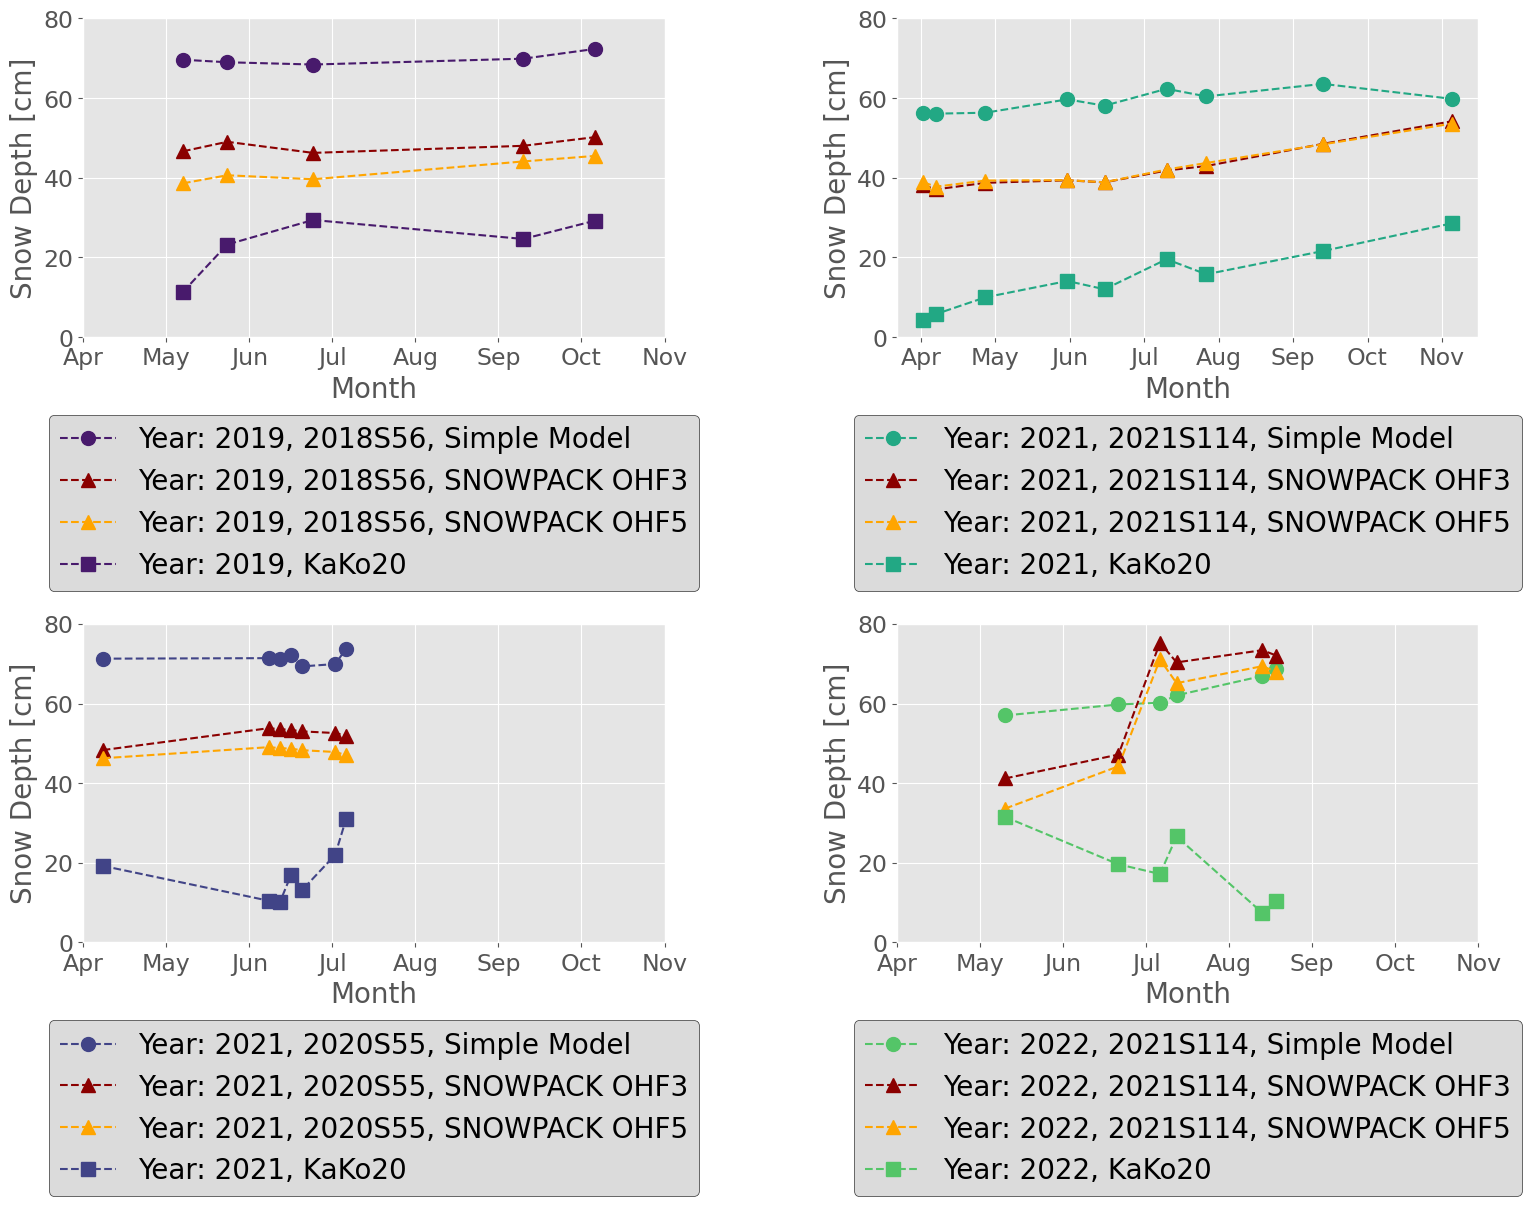

In [23]:
# Set the y-axis limits
y_limits = (0, 80)

# Define the custom color palette
custom_palette = sns.color_palette("viridis", 14)

# Define the mapping for old sensor numbers to new format
sensor_number_mapping = {
    "S119": "2022S119",
    "S56": "2018S56",
    "S55": "2020S55",
    "S114": "2021S114",
    "S112": "2021S112"
}

# Update the Sensor_Number column in matches_all DataFrame
matches_sat_1D_OHF3_OHF5["Sensor_Number"] = matches_sat_1D_OHF3_OHF5["Sensor_Number"].map(sensor_number_mapping).fillna(matches_sat_1D_OHF3_OHF5["Sensor_Number"])

# Create a mapping from sensor number to specific colors from the custom palette
sensor_color_map = {
    "2022S119": custom_palette[13],
    "2018S56": custom_palette[0],
    "2020S55": custom_palette[2],
    "2021S114": custom_palette[8],
    "2021S112": custom_palette[5]
}

# Update the specific condition for "2021S114" in year 2022
special_condition_color = custom_palette[10]

# Create a new column "Month_Day" that combines month and day into a fractional month representation
matches_sat_1D_OHF3_OHF5["Month_Day"] = matches_sat_1D_OHF3_OHF5["Month"] + matches_sat_1D_OHF3_OHF5["Day"] / 30.0

# Create a new column combining "Sensor_Number" and "Year" for unique color assignment
matches_sat_1D_OHF3_OHF5["Sensor_Year"] = matches_sat_1D_OHF3_OHF5["Sensor_Number"].astype(str) + "_" + matches_sat_1D_OHF3_OHF5["Year"].astype(str)

fig, axes = plt.subplots(2, 2, figsize=(18, 12), gridspec_kw={"hspace": 0.9, "wspace": 0.4})  

# Flatten the axes array to easily iterate over it
axes = axes.flatten()

# Define the 4 sensor-year combinations you want to plot
sensor_years_to_plot = ["2018S56_2019", "2021S114_2021", "2020S55_2021", "2021S114_2022"]

# Loop through each subplot and plot a different sensor-year combination
for i, ax in enumerate(axes[:4]):  # Plot only 4 subplots
    sensor_year = sensor_years_to_plot[i]
    sensor_year_data = matches_sat_1D_OHF3_OHF5[matches_sat_1D_OHF3_OHF5["Sensor_Year"] == sensor_year]
    
    # Check if the filtered data is not empty
    if sensor_year_data.empty:
        ax.text(0.5, 0.5, f"No data for {sensor_year}", ha="center", va="center", fontsize=14, color="red")
        ax.set_xticks([])
        ax.set_yticks([])
        continue  # Skip plotting if no data is available

    # Extract the year and sensor information
    year = sensor_year.split("_")[1]
    sensor = sensor_year.split("_")[0]
    
    # Determine the color based on the sensor number and special condition
    if sensor == "2021S114" and year == "2022":
        color = special_condition_color
    else:
        color = sensor_color_map.get(sensor, "black")  

    # Plot buoy data with circles
    ax.plot(sensor_year_data["Month_Day"], sensor_year_data["Snow_depth_buoy"], marker="o", linestyle="--", 
             markersize=10, label=f"Year: {year}, {sensor}, Simple Model", color=color)
    
    ax.plot(sensor_year_data["Month_Day"], sensor_year_data["mean_snow_cm_OHF3"], marker="^", linestyle="--", 
             markersize=10, label=f"Year: {year}, {sensor}, SNOWPACK OHF3", color="darkred")
    
    ax.plot(sensor_year_data["Month_Day"], sensor_year_data["mean_snow_cm_OHF5"], marker="^", linestyle="--", 
             markersize=10, label=f"Year: {year}, {sensor}, SNOWPACK OHF5", color="orange")
    
    # Plot satellite data with squares
    ax.plot(sensor_year_data["Month_Day"], sensor_year_data["Snow_depth_satellite"], marker="s", linestyle="--", 
             markersize=10, label=f"Year: {year}, KaKo20", color=color)
    
    # Set x-axis labels to be the month names with approximate positions
    ax.set_xticks([4 + i for i in range(8)])
    ax.set_xticklabels(["Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov"])
    ax.set_ylim(y_limits)
    
    ax.tick_params(axis="x", labelsize=17)
    ax.tick_params(axis="y", labelsize=17)
    ax.grid(True)
    ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.2), fontsize=20, ncol=1, frameon=True, facecolor="lightgrey", edgecolor="black")
    ax.set_xlabel("Month", fontsize=20)
    ax.set_ylabel("Snow Depth [cm]", fontsize=20)


#plt.savefig("SnowDepthComparism_subplots_SNOWPACK_OFH5_OHF3.png", bbox_inches="tight")
plt.show()


In [24]:
matches_sat_1D_OHF3_OHF5["Difference"] = matches_sat_1D_OHF3_OHF5["Snow_depth_buoy"] - matches_sat_1D_OHF3_OHF5["Snow_depth_satellite"]
matches_sat_1D_OHF3_OHF5["Difference_OHF3"] = matches_sat_1D_OHF3_OHF5["mean_snow_cm_OHF3"] - matches_sat_1D_OHF3_OHF5["Snow_depth_satellite"]
matches_sat_1D_OHF3_OHF5["Difference_OHF5"] = matches_sat_1D_OHF3_OHF5["mean_snow_cm_OHF5"] - matches_sat_1D_OHF3_OHF5["Snow_depth_satellite"]

In [25]:
Differences = matches_sat_1D_OHF3_OHF5["Difference"]
Differences_OHF3 = matches_sat_1D_OHF3_OHF5["Difference_OHF3"]
Differences_OHF5 = matches_sat_1D_OHF3_OHF5["Difference_OHF5"]

SampleMean_Differences = np.nanmean(Differences)
SampleMean_Differences_OHF3 = np.nanmean(Differences_OHF3)
SampleMean_Differences_OHF5 = np.nanmean(Differences_OHF5)

SampleMedian_Differences = np.nanmedian(Differences)
SampleMedian_Differences_OHF3 = np.nanmedian(Differences_OHF3)
SampleMedian_Differences_OHF5 = np.nanmedian(Differences_OHF5)

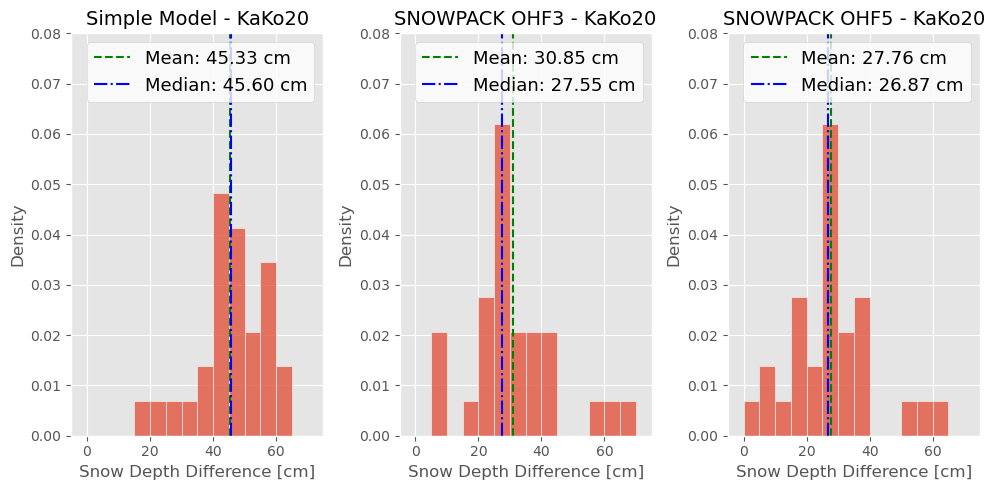

In [26]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

# Define font size
title_fontsize = 14
label_fontsize = 12
linespacing = 1.5

# Set the axis limits
x_limits = (-5, 75)
y_limits = (0, 0.08)

# Definebin width and calculate the number of bins
bin_width = 5
bins = np.arange(x_limits[0], x_limits[1] + bin_width, bin_width)

sns.histplot(Differences, kde=False, stat="density", bins=bins, ax=axs[0])
axs[0].axvline(SampleMean_Differences, color="green", linestyle="--", label="Mean: {:.2f} cm".format(SampleMean_Differences))
axs[0].axvline(SampleMedian_Differences, color="blue", linestyle="-.", label="Median: {:.2f} cm".format(SampleMedian_Differences))
axs[0].set_title("Simple Model - KaKo20", fontsize=title_fontsize, linespacing=linespacing)
axs[0].set_xlabel("Snow Depth Difference [cm]", fontsize=label_fontsize)
axs[0].set_xlim(x_limits)
axs[0].set_ylim(y_limits)
axs[0].legend(loc="best", fontsize=13, facecolor="white")


sns.histplot(Differences_OHF3, kde=False, stat="density", bins=bins, ax=axs[1])
axs[1].axvline(SampleMean_Differences_OHF3, color="green", linestyle="--", label="Mean: {:.2f} cm".format(SampleMean_Differences_OHF3))
axs[1].axvline(SampleMedian_Differences_OHF3, color="blue", linestyle="-.", label="Median: {:.2f} cm".format(SampleMedian_Differences_OHF3))
axs[1].set_title("SNOWPACK OHF3 - KaKo20", fontsize=title_fontsize, linespacing=linespacing)
axs[1].set_xlabel("Snow Depth Difference [cm]", fontsize=label_fontsize)
axs[1].set_xlim(x_limits)
axs[1].set_ylim(y_limits)
axs[1].legend(loc="best", fontsize=13, facecolor="white")

sns.histplot(Differences_OHF5, kde=False, stat="density", bins=bins, ax=axs[2])
axs[2].axvline(SampleMean_Differences_OHF5, color="green", linestyle="--", label="Mean: {:.2f} cm".format(SampleMean_Differences_OHF5))
axs[2].axvline(SampleMedian_Differences_OHF5, color="blue", linestyle="-.", label="Median: {:.2f} cm".format(SampleMedian_Differences_OHF5))
axs[2].set_title("SNOWPACK OHF5 - KaKo20", fontsize=title_fontsize, linespacing=linespacing)
axs[2].set_xlabel("Snow Depth Difference [cm]", fontsize=label_fontsize)
axs[2].set_xlim(x_limits)
axs[2].set_ylim(y_limits)
axs[2].legend(loc="best", fontsize=13, facecolor="white")


plt.tight_layout()

plt.savefig("Difference_Histogram.png", dpi=300, bbox_inches="tight")

plt.show()
